# Graph Hawaii Ocean Time-Series Data
from http://hahana.soest.hawaii.edu/hot/products/products.html

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

### Import HOT data

In [28]:
hot_df = pd.read_csv('HOT_surface_CO2.txt', header = 8, delimiter = '\t', parse_dates = [2])
hot_df.set_index('date', inplace = True)
hot_df.head(5)

,cruise,days,temp,sal,phos,sil,DIC,TA,nDIC,nTA,...,pHmeas_insitu,pHcalc_25C,pHcalc_insitu,pCO2calc_insitu,pCO2calc_20C,aragsatcalc_insitu,calcsatcalc_insitu,freeCO2_insitu,carbonate_insitu,notes
date,,,,,,,,,,,,,,,,,,,,,
1988-10-31,1,30,26.283,35.186,0.08,0.71,1963.91,2319.5,1953.5,2307.2,...,-999.0,8.1292,8.1097,330.9,256.3,3.98,6.02,9.06,250.2,abc
1988-12-02,2,62,25.659,34.984,0.09,0.99,1958.94,2304.9,1959.8,2306.0,...,-999.0,8.1193,8.1092,330.6,262.6,3.87,5.86,9.20,243.5,bc
1989-01-08,3,99,24.610,35.028,0.07,0.93,1963.77,2305.0,1962.2,2303.2,...,-999.0,8.1113,8.1168,324.3,268.7,3.80,5.77,9.27,240.1,c
1989-02-26,4,148,23.479,34.883,0.09,0.88,1957.80,2295.5,1964.4,2303.2,...,-999.0,8.1091,8.1316,310.9,269.7,3.74,5.69,9.15,237.2,cd
1989-03-27,5,177,24.278,34.735,0.12,2.01,1946.33,2283.0,1961.2,2300.4,...,-999.0,8.1113,8.1218,317.7,266.8,3.74,5.69,9.17,236.4,ac


### Filter out bad data

In [29]:
good_samples = (hot_df.loc[:, 'pCO2calc_20C'] != -999)
hot_good_df = pd.DataFrame(hot_df[good_samples])
hot_good_df.head()

,cruise,days,temp,sal,phos,sil,DIC,TA,nDIC,nTA,...,pHmeas_insitu,pHcalc_25C,pHcalc_insitu,pCO2calc_insitu,pCO2calc_20C,aragsatcalc_insitu,calcsatcalc_insitu,freeCO2_insitu,carbonate_insitu,notes
date,,,,,,,,,,,,,,,,,,,,,
1988-10-31,1,30,26.283,35.186,0.08,0.71,1963.91,2319.5,1953.5,2307.2,...,-999.0,8.1292,8.1097,330.9,256.3,3.98,6.02,9.06,250.2,abc
1988-12-02,2,62,25.659,34.984,0.09,0.99,1958.94,2304.9,1959.8,2306.0,...,-999.0,8.1193,8.1092,330.6,262.6,3.87,5.86,9.20,243.5,bc
1989-01-08,3,99,24.610,35.028,0.07,0.93,1963.77,2305.0,1962.2,2303.2,...,-999.0,8.1113,8.1168,324.3,268.7,3.80,5.77,9.27,240.1,c
1989-02-26,4,148,23.479,34.883,0.09,0.88,1957.80,2295.5,1964.4,2303.2,...,-999.0,8.1091,8.1316,310.9,269.7,3.74,5.69,9.15,237.2,cd
1989-03-27,5,177,24.278,34.735,0.12,2.01,1946.33,2283.0,1961.2,2300.4,...,-999.0,8.1113,8.1218,317.7,266.8,3.74,5.69,9.17,236.4,ac


### Plot time-series data

<IPython.core.display.Javascript object>


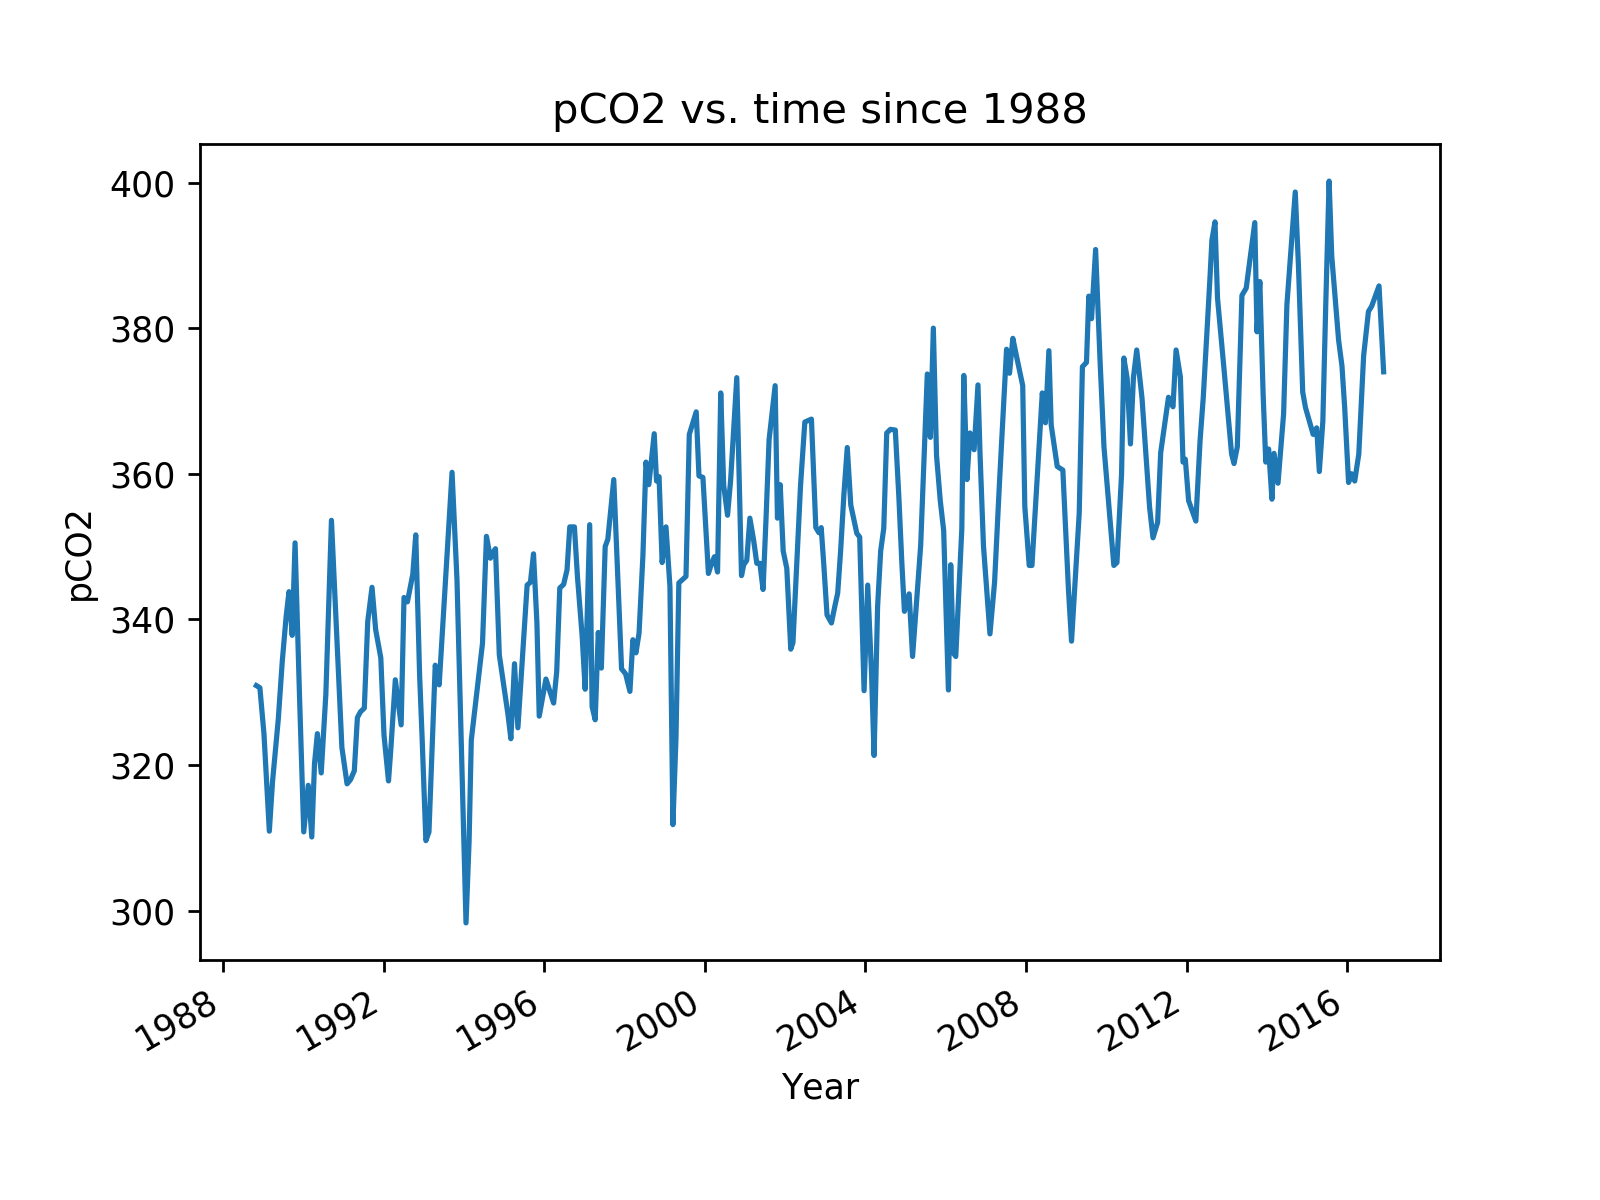

In [36]:
fig, axs = plt.subplots()
axs.plot(hot_good_df.index, hot_good_df.loc[:, 'pCO2calc_insitu'])
axs.set_xlabel('Year')
axs.set_ylabel('pCO2')
axs.set_title('pCO2 vs. time since 1988')
fig.autofmt_xdate()
plt.savefig('pCO2_at_HOT.png')